In [7]:
!pip install pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Step 2: Load Data
df = pd.read_csv("personality_datasert.csv")  # <- Upload file to Colab first

Accuracy: 0.9241379310344827

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



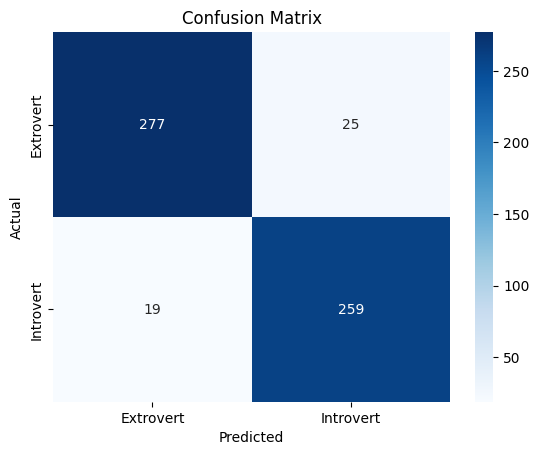

In [9]:




# Step 3: Preprocess Data
# Convert Yes/No to 1/0
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Convert Personality to binary
df['Personality'] = df['Personality'].map({'Introvert': 1, 'Extrovert': 0})

# Step 4: Prepare Features and Target
X = df.drop("Personality", axis=1)  # Features
y = df["Personality"]               # Target

# Step 5: Split into Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make Predictions and Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Extrovert', 'Introvert'], yticklabels=['Extrovert', 'Introvert'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔍 Correlation with Personality:

Personality                  1.000000
Stage_fear                   0.847467
Drained_after_socializing    0.845388
Time_spent_Alone             0.712468
Friends_circle_size         -0.687203
Post_frequency              -0.721062
Social_event_attendance     -0.721520
Going_outside               -0.739251
Name: Personality, dtype: float64


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


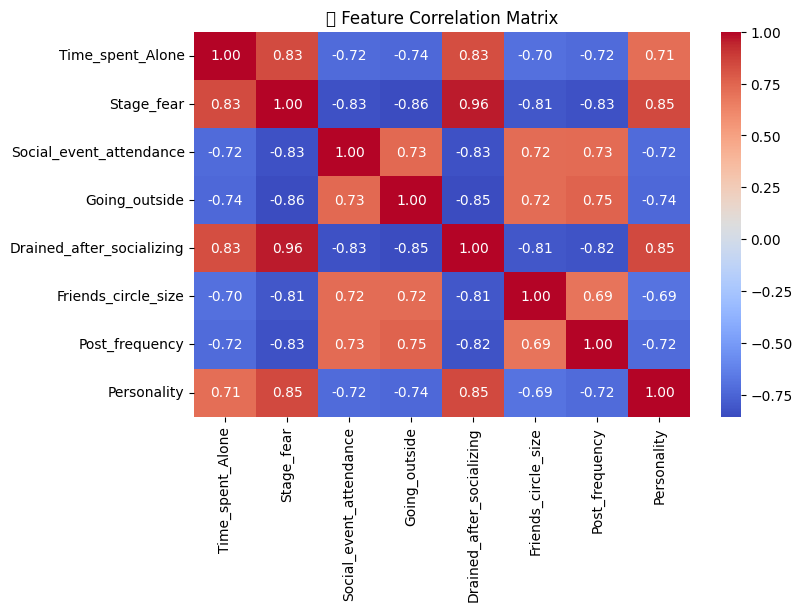

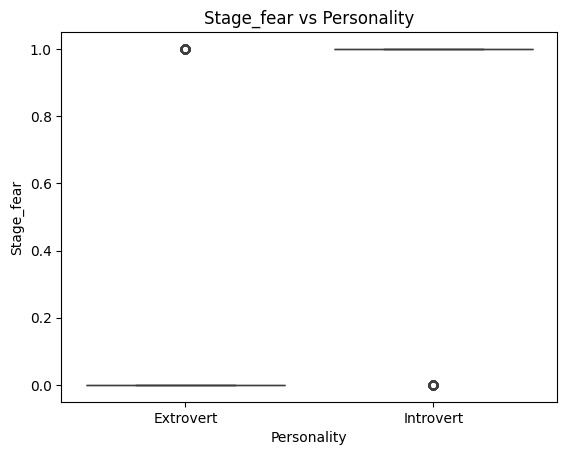

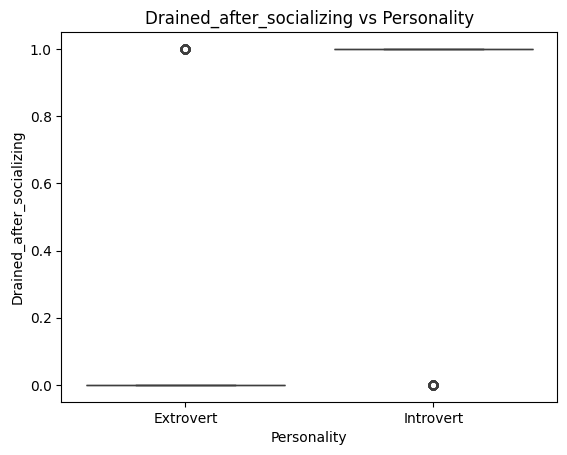

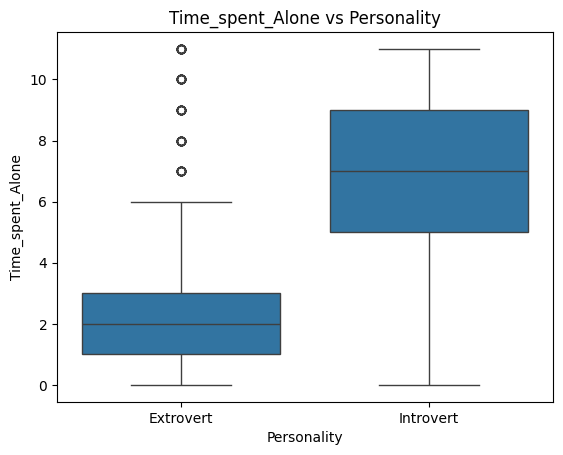

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlation matrix
correlations = df.corr(numeric_only=True)  # Only numeric columns

# Step 2: Print correlation with Personality only
personality_corr = correlations["Personality"].sort_values(ascending=False)
print("🔍 Correlation with Personality:\n")
print(personality_corr)

# Step 3: Optional — Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Feature Correlation Matrix")
plt.show()

# Step 4: Optional — Plot top 3 most correlated features
top_corr = personality_corr.drop("Personality").head(3).index.tolist()

for feature in top_corr:
    sns.boxplot(x="Personality", y=feature, data=df)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.title(f'{feature} vs Personality')
    plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess again if needed
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 1, 'Extrovert': 0})

# Get numeric correlation with Personality only
correlations = df.corr(numeric_only=True)['Personality'].drop('Personality')

# Filter for strong correlations (abs ≥ 0.5)
strong_corr = correlations[correlations.abs() >= 0.5].sort_values(ascending=False)

# Show top correlated features
print("🔍 Strong correlations with Personality (≥ 0.5 or ≤ -0.5):\n")
print(strong_corr)

# Plot them
for feature in strong_corr.index:
    sns.boxplot(x="Personality", y=feature, data=df)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.title(f'{feature} vs Personality')
    plt.show()


🔍 Strong correlations with Personality (≥ 0.5 or ≤ -0.5):

Series([], Name: Personality, dtype: float64)


🔍 Strong correlations with Personality (≥ 0.5 or ≤ -0.5):

Stage_fear                   0.847467
Drained_after_socializing    0.845388
Time_spent_Alone             0.712468
Friends_circle_size         -0.687203
Post_frequency              -0.721062
Social_event_attendance     -0.721520
Going_outside               -0.739251
Name: Personality, dtype: float64


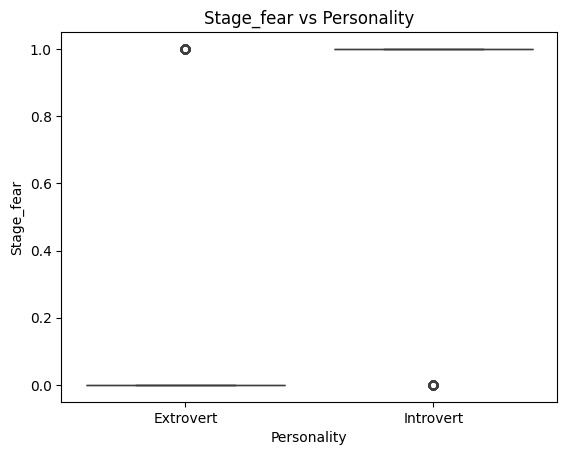

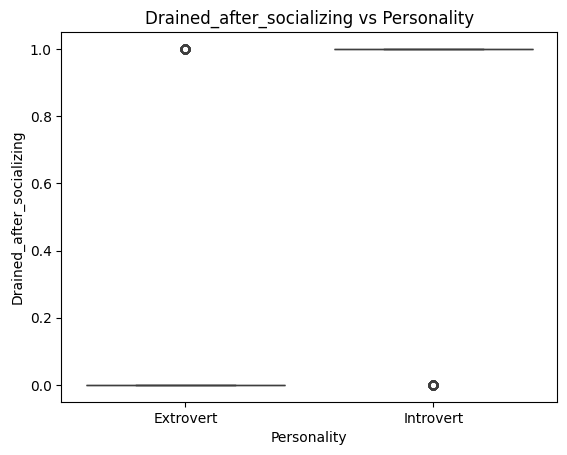

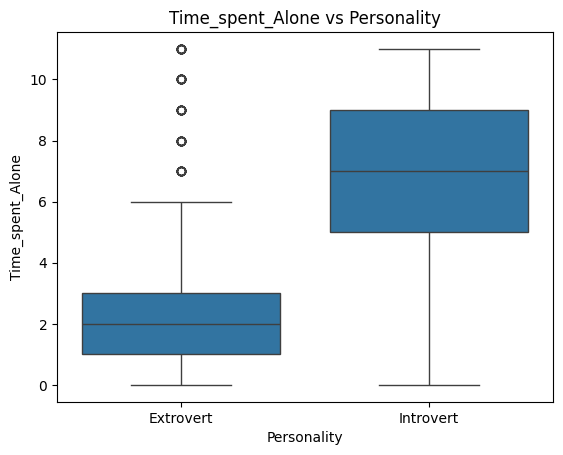

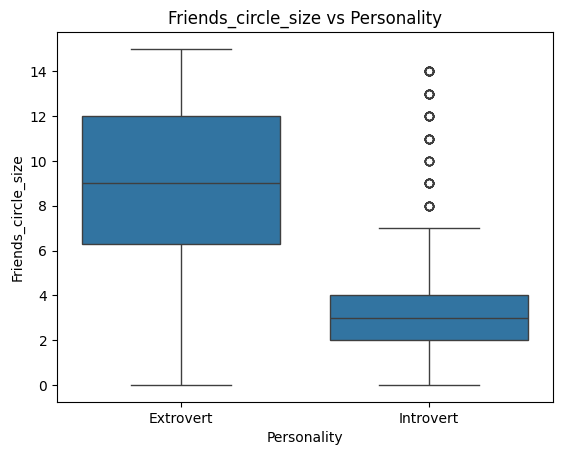

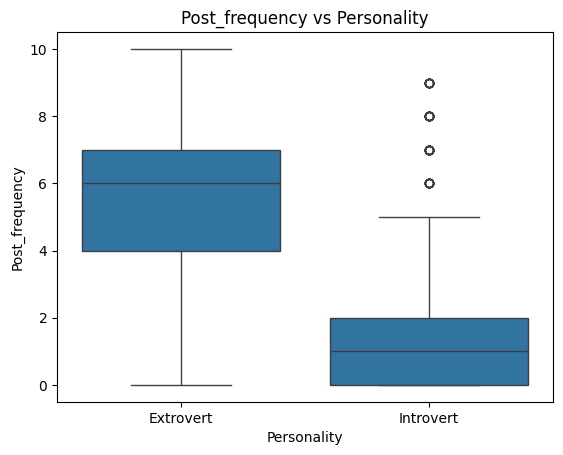

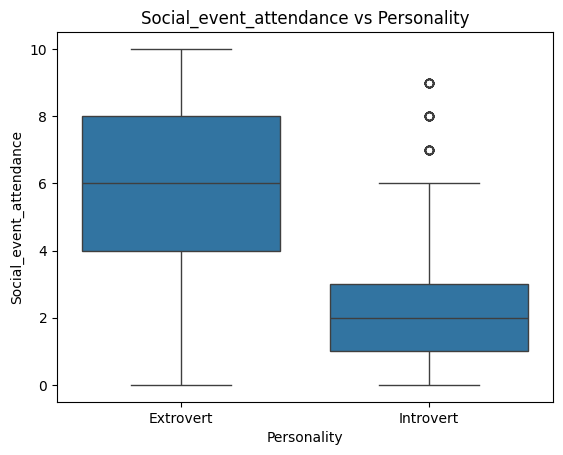

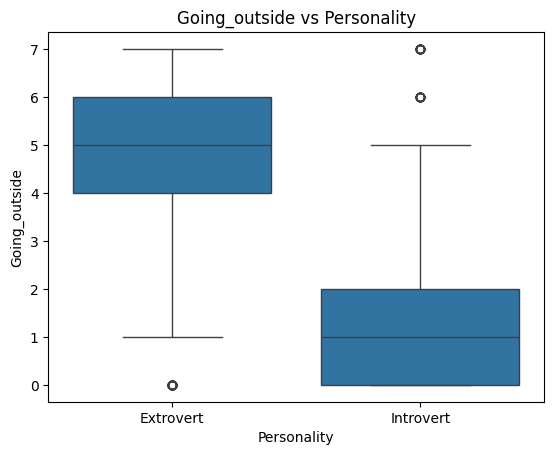

In [5]:
# If not done already, preprocess again
df_processed = df.copy()

df_processed['Stage_fear'] = df_processed['Stage_fear'].map({'Yes': 1, 'No': 0})
df_processed['Drained_after_socializing'] = df_processed['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df_processed['Personality'] = df_processed['Personality'].map({'Introvert': 1, 'Extrovert': 0})

# Now check correlation using df_processed
correlations = df_processed.corr(numeric_only=True)['Personality'].drop('Personality')

# Filter strong correlations
strong_corr = correlations[correlations.abs() >= 0.5].sort_values(ascending=False)

# Show results
print("🔍 Strong correlations with Personality (≥ 0.5 or ≤ -0.5):\n")
print(strong_corr)

# Visualize
for feature in strong_corr.index:
    sns.boxplot(x="Personality", y=feature, data=df_processed)
    plt.xticks([0, 1], ['Extrovert', 'Introvert'])
    plt.title(f'{feature} vs Personality')
    plt.show()


In [11]:
import joblib

# Save the trained model
joblib.dump(model, "personality_model.pkl")

# Optional: Save the preprocessor (in case you use pipelines)
# joblib.dump(preprocessor, "preprocessor.pkl")  # If used


['personality_model.pkl']